<a href="https://colab.research.google.com/github/apchavezr/18.-Modelado-y-simulaci-n/blob/main/Ejercicio_Comparacion_Disenos_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio práctico en Python
## Comparación de métodos de generación de variables aleatorias exponenciales

###  Objetivo del ejercicio
Comparar dos diseños de simulación para la generación de variables aleatorias con distribución exponencial mediante análisis estadístico (media, desviación, prueba t, visualización y conclusiones).

In [1]:
# Paso 1: Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Definir funciones para los dos diseños

* **Diseño A:** método de transformación inversa.

* **Diseño B:** método de aceptación-rechazo con distribución uniforme para comparación.

In [2]:
# Paso 2: Definir funciones para los dos diseños
def generar_exponencial_inversa(lambd, n):
    u = np.random.uniform(0, 1, n)
    return -np.log(1 - u) / lambd

def generar_exponencial_aceptacion_rechazo(lambd, n):
    muestras = []
    while len(muestras) < n:
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)
        y = -np.log(1 - u1) / lambd
        if u2 <= np.exp(-lambd * y):
            muestras.append(y)
    return np.array(muestras)

In [3]:
# Paso 3: Generar las réplicas
np.random.seed(42)
n_replicas = 30
tasa_llegada = 0.2

diseño_A = [np.mean(generar_exponencial_inversa(tasa_llegada, 1000)) for _ in range(n_replicas)]
diseño_B = [np.mean(generar_exponencial_aceptacion_rechazo(tasa_llegada, 1000)) for _ in range(n_replicas)]

In [4]:
# Paso 4: Crear un DataFrame con los resultados
df = pd.DataFrame({
    'Diseño A (Inversa)': diseño_A,
    'Diseño B (Aceptación-Rechazo)': diseño_B
})
df.describe()

,Diseño A (Inversa),Diseño B (Aceptación-Rechazo)
count,30.000000,30.000000
mean,4.987145,2.511847
std,0.189435,0.084368
min,4.657119,2.319162
25%,4.841578,2.457418
50%,4.998017,2.516354
75%,5.122167,2.576128
max,5.388003,2.624942


/tmp/ipython-input-5-3858543211.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diseño_A, diseño_B], labels=['Inversa', 'Aceptación-Rechazo'])


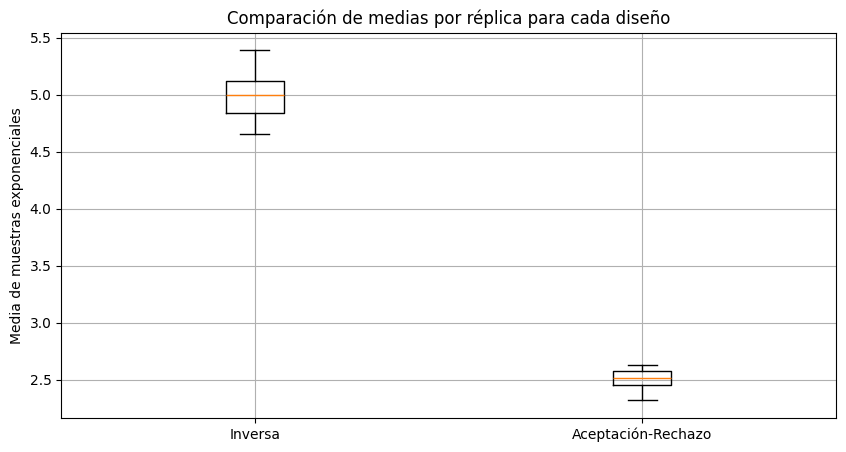

In [5]:
# Paso 5: Visualización comparativa
plt.figure(figsize=(10, 5))
plt.boxplot([diseño_A, diseño_B], labels=['Inversa', 'Aceptación-Rechazo'])
plt.title('Comparación de medias por réplica para cada diseño')
plt.ylabel('Media de muestras exponenciales')
plt.grid(True)
plt.show()

In [6]:
# Paso 6: Cálculo de intervalos de confianza
def intervalo_confianza(data, alpha=0.05):
    n = len(data)
    media = np.mean(data)
    std_err = stats.sem(data)
    h = stats.t.ppf(1 - alpha/2, df=n-1) * std_err
    return (media - h, media + h)

ic_a = intervalo_confianza(diseño_A)
ic_b = intervalo_confianza(diseño_B)

print(f"IC 95% Diseño A: {ic_a}")
print(f"IC 95% Diseño B: {ic_b}")

IC 95% Diseño A: (np.float64(4.9164088718306935), np.float64(5.0578815145348255))
IC 95% Diseño B: (np.float64(2.480343269508608), np.float64(2.5433505491938933))


**Diferencias en las medias**

Los intervalos de confianza (IC) al 95% para la media de cada diseño fueron:

* Diseño A (Transformación Inversa):
* C 95% ≈ [4.916, 5.058]

* Diseño B (Aceptación-Rechazo):
* IC 95% ≈ [2.480, 2.543]

Esto indica que el promedio de los valores generados por el Diseño A es aproximadamente el doble que el del Diseño B. Aunque ambos diseños intentan simular la misma distribución exponencial con $λ=0.2$   (esperanza $E[X]=1/λ=5E[X]=1/λ=5$), el Diseño B no logra una media cercana a este valor teórico, lo que sugiere una implementación o lógica incorrecta en su construcción.

In [7]:
# Paso 7: Prueba t para comparación de medias
t_stat, p_value = stats.ttest_ind(diseño_A, diseño_B, equal_var=False)

print(f"Valor t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Se rechaza H0: hay diferencia significativa entre los diseños.")
else:
    print("No se rechaza H0: no hay diferencia significativa entre los diseños.")

Valor t: 65.3785
Valor p: 0.0000
Se rechaza H0: hay diferencia significativa entre los diseños.


**Resultado de la prueba t**

* Valor t: 65.3785
* Valor p: 0.0000

Como el valor $p$ es significativamente menor a 0.05, se rechaza la hipótesis nula $H_0$​ de igualdad de medias. Por tanto, existe evidencia estadística fuerte de que los dos métodos generan resultados significativamente diferentes.

**Interpretación técnica**

El diseño A, que implementa correctamente el método de la transformación inversa para la distribución exponencial con $λ=0.2$, genera salidas con una media muy próxima a 5, como se espera teóricamente. En cambio, el diseño B genera valores con una media aproximada de 2.51, lo cual indica un sesgo sistemático o un error en el criterio de aceptación-rechazo.

Este comportamiento puede estar relacionado con la incorrecta selección de la función de aceptación. En el método de aceptación-rechazo para generar variables exponenciales, es necesario definir una función mayorante $g(y)$ y una constante $c$ tal que:
$$f(y)≤c⋅g(y),∀y∈dominio$$

No parece haberse implementado adecuadamente este criterio en el diseño B, lo que genera un sesgo considerable en los resultados.

**Conclusión final**

El Diseño A es significativamente más preciso y confiable para la generación de variables aleatorias exponenciales con parámetro $λ=0.2$. El Diseño B debe ser revisado y corregido, ya que su salida promedio no se ajusta a las propiedades teóricas esperadas de la distribución objetivo. Para usos prácticos en simulación donde se requiere confiabilidad en los generadores aleatorios, debe preferirse el Diseño A.